# Sismique onde P : Inversion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt
from pygimli.viewer.mpl import createColorBar

In [2]:
data = pg.physics.traveltime.load('data.sgt')
print(data)

Data: Sensors: 97 data: 2352, nonzero entries: ['g', 's', 't', 'valid']


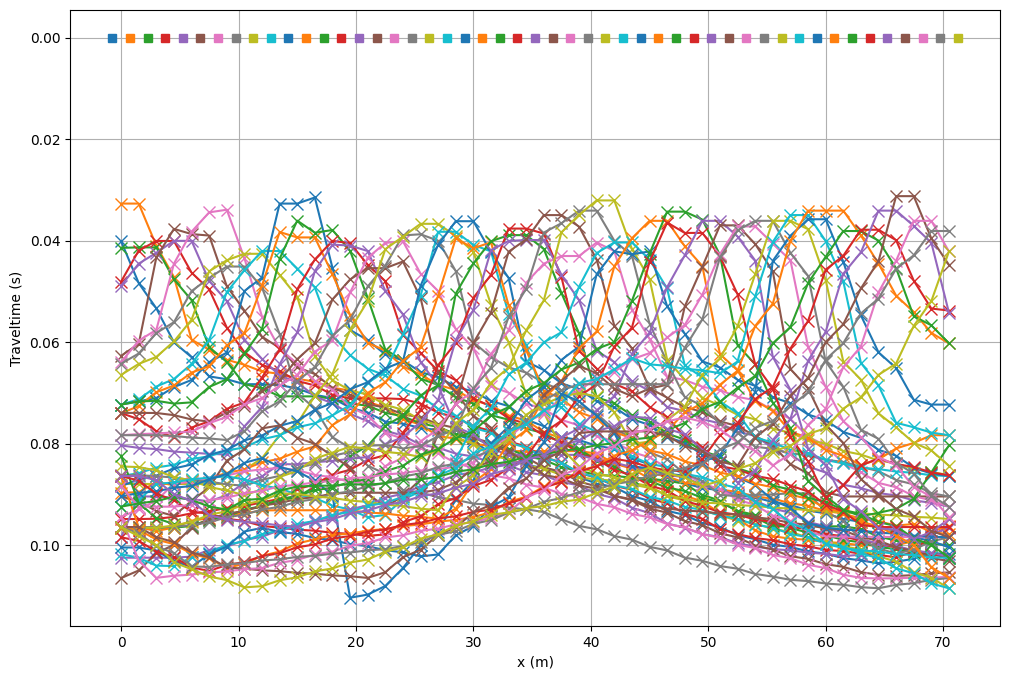

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
tt.show(data, ax=ax)

In [6]:
mgr = tt.TravelTimeManager(data)

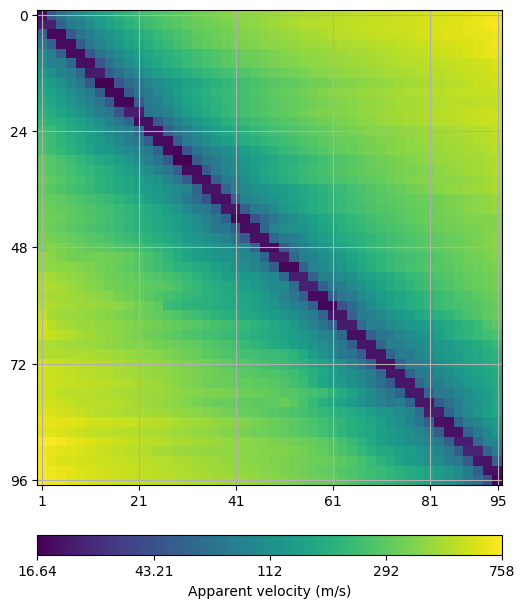

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8))

ax, cbar = mgr.showData(ax=ax)

In [8]:
mgr.invert(secNodes=3, paraMaxCellSize=5.0,
           zWeight=0.2, vTop=500, vBottom=4000, verbose=1, usegradient=True)

./core/src/meshentities.cpp:36		GIMLI::Boundary* GIMLI::findBoundary_(const std::set<Boundary*>&)  pls. check, this should not happen.  There is more than one boundary defined.2
Boundary 0x55cded990660 rtti: 22 id: 0	N: 0 1  marker: 1 
Boundary 0x55cdede8f330 rtti: 22 id: 194	N: 4 0  marker: -1 
30/11/24 - 21:20:11 - pyGIMLi - INFO - Found 1 regions.
30/11/24 - 21:20:11 - pyGIMLi - INFO - Found 1 regions.
30/11/24 - 21:20:11 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(TravelTimeManager.py:98)
DataContainer has no "err" values. Fallback to 3%
30/11/24 - 21:20:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
30/11/24 - 21:20:11 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
30/11/24 - 21:20:11 - pyGIMLi - INFO - Create gradient starting model. 500: 4000
30/11/24 - 21:20:12 - pyGIMLi - INFO - Created startmodel from forward operator: 1853, min/max=0.000250/0.002000
30/11/24 - 21:20:12 

Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  2

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  1
Total running milliseconds:  8

Statistics:

  Input vertices: 195
  Input segments: 196
  Input holes: 0

  Mesh vertices: 1049
  Mesh triangles: 1853
  Mesh edges: 2901
  Mesh exterior boundary edges: 243
  Mesh interior boundary edges: 0
  Mesh subsegments (constrained edges): 243

min/max(dweight) = 301.989/1067.46
fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x7f8dcd753420>
Data transformation: <pgcore._pygimli_.RTrans object at 0x7f8dcd752700>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0

9: Model: min = 0.000299922; max = 0.069316
9: Response: min = 0.0277582; max = 0.109388
9: rms/rrms(data, Response) = 0.00353957/4.78859%
9: chi^2(data, Response, error, log) = 2.54784
9: Phi = 5992.52+50.1054*20=6994.63
chi² =    2.55 (dPhi = 5.05%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 10 ... Calculating Jacobian matrix (forced=1)...... 6.50509 s
solve CGLSCDWWtrans with lambda = 20
tau = 0. Trying parabolic line search with step length 0.3 ==> tau = 0.112311
10: LS newModel: min = 0.000298895; max = 0.0940477
10: LS newResponse: min = 0.0219152; max = 0.108661
10: rms/rrms(data, LS newResponse) = 0.00471114/6.43991%
10: chi^2(data, LS newResponse, error, log) = 4.60804
10: Phi = 10838.1+65.0744*20=12139.6
Performing line search with tau = 0.112311
10: Model: min = 0.00030148; max = 0.0696171
10: Response: min = 0.0284511; max = 0.109429
10: rms/rrms(data, Response) = 0.00349193/4.70639%
10: chi^2(data, Response, error, l

1853 [18.30203343510067,...,2680.898165890912]

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7f8dcc2d2190>)

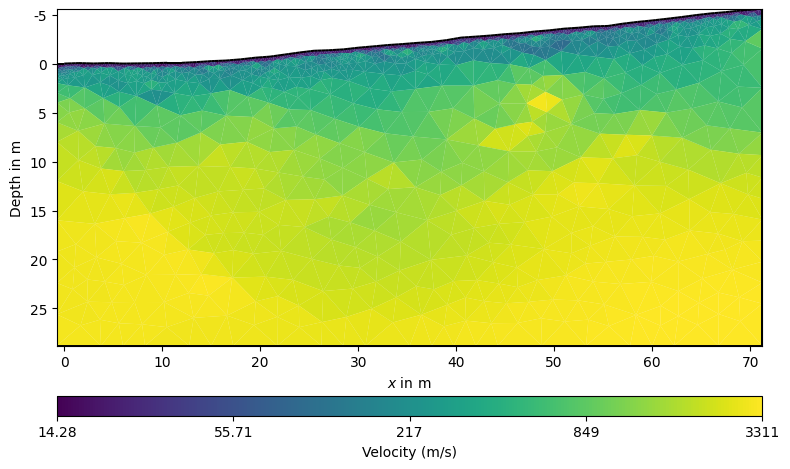

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

mgr.showResult(ax=ax)

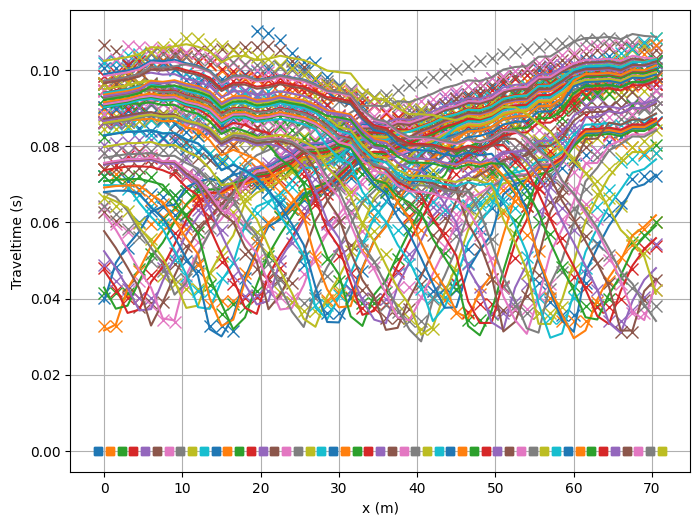

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

mgr.showFit(firstPicks=True, ax=ax)

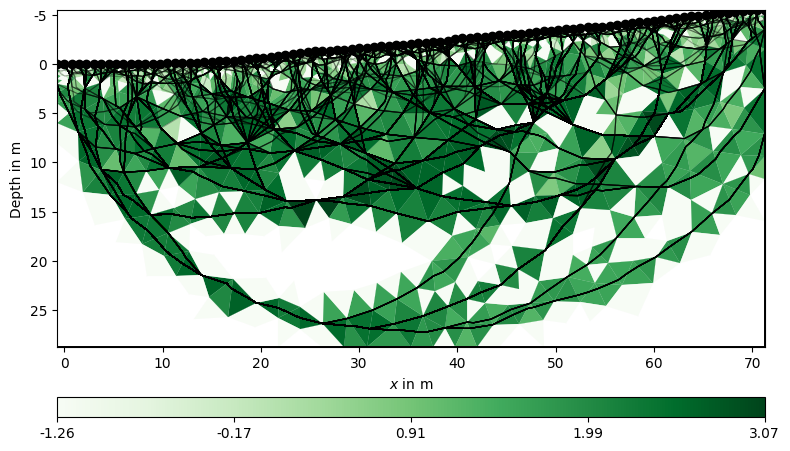

In [11]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sensors = data.sensorPositions()
mgr.showCoverage(ax=ax, cMap="Greens")
mgr.drawRayPaths(ax=ax, color="k", alpha=0.3)
p = ax.plot(sensors[:, 0], sensors[:, 1], "ko")

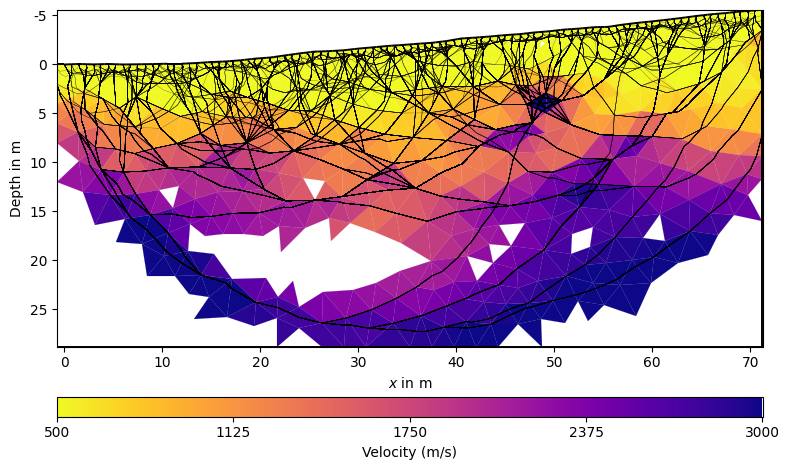

In [12]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax, cbar = mgr.showResult(logScale=False, cMin=500, cMax=3000, cMap="plasma_r",
                          coverage=mgr.standardizedCoverage(), ax=ax)
rays = mgr.drawRayPaths(ax=ax, color="k", lw=0.3, alpha=0.5)